# Collections: Deal with several Images or Instruments

When you wish to combine several instances (e.g. images/instruments) you should use a "collection" (inherating from 'BaseCollection'). A collection has sources ('_handler') which is a dictionnary that enable to access the instances based on "id". 

It exists several collection avialable (see astrobject.collection). We present here the 'ImageCollection'.
## ImageCollection
'ImageCollection' enables to deal with basic information shared by sources mainly:
* joined catalogue
* jointed target

In addition it has advanced tools, like field of view visualization.

## Create the ImageCollection and Access the data

In [1]:
## plot within the notebook
%matplotlib inline
import warnings
## No annoying warnings
warnings.filterwarnings('ignore')
# - Astrobject Modules
from astrobject.utils.tools import load_pkl

## Initialization

In [3]:
# get all the sdss image of PTF10qjq in data/
sdss_files_buti = ["data/sdss_PTF10qjq_u.fits",
                   "data/sdss_PTF10qjq_g.fits",
                   "data/sdss_PTF10qjq_r.fits",
                   "data/sdss_PTF10qjq_z.fits"]

# and load them in an ImageCollection
imc = collection.ImageCollection(sdss_files_buti)

Fetching a new catalogue
downloading catalogue for sdss_PTF10qjq_u.fits


Remark: A catalogue is automatically downloaded for the image's field of view. Set 'catalogue' argument to False to avoid that.

**_code structure_** the initiallization of a collection calls the 'create()' method. For 'ImageCollection', 
'create()' loops over 'add_image()' and label each new source by its file name. Each time 'add_image()' is called, it checks if the current instance's catalogue cover the new image's FoV and will extend it if necessary. This extention makes use of the 'merge()' method of Catalogues. Consequently, if you load images that share the same region of the sky (like in this example) a catalogue is only loaded once.

#### Add an image

We did not load the sdss "i" band, let's add it manually. Remark that because the instance 'imc' already have the catalogue for its fov this loading is fast.

In [4]:
imc.add_image("data/sdss_PTF10qjq_i.fits")

You can access the list of known sources as follows:

In [5]:
print imc.list_id # strickly equal here to the more general imc.list_sources (BaseCollection)

['sdss_PTF10qjq_g.fits', 'sdss_PTF10qjq_i.fits', 'sdss_PTF10qjq_r.fits', 'sdss_PTF10qjq_u.fits', 'sdss_PTF10qjq_z.fits']


If you know to get the "g" band 'instrument' object:

In [6]:
sdssg = imc.get_image("sdss_PTF10qjq_g.fits")

If the instance had a catalogue and/or a target, they are set to the requested instrument.

**_Tip_** The first time you want to access an instrument, it is loaded in memory (saved in imc.images[sourceid]['image']). Any further calls will thus be fast.

#### Add a target

In [8]:
from astrobject import get_target

In [14]:
dico = load_pkl("data/PTF10qjq_sninfo.pkl")
dico['type_'] = dico.pop("type")
_ = dico.pop('IUACname')

In [15]:
target = get_target(**dico)
imc.set_target(target)

Planck 2015 cosmology used by default


**Remark** the 'set_target()' method of ImageCollection passes the target to all loaded images (if any) if the target is within the image field of view (success of the 'image.set_target()'). A warning is raised when failed. You can avoid this automatic passing by setting 'set_to_catalogue' argument of the method to False

**_Tip_** You similarly have the 'remove()' method

In [16]:
# the sdss image now has a target since sdssg is a pointer to the corresponding imc source !
print sdssg.has_target()
print sdssg.target.name

True
PTF10qjq


In [18]:
pp = sdssg.get_target_photopoint(3)

In [20]:
pp._properties

{'bandname': 'sdssg',
 'flux': 2.9471515399542535e-16,
 'lbda': 4717.598249924572,
 'mjd': 51991.47022418981,
 'var': 1.5713611091964135e-36,
 'zp': 22.5}

### Get a subpart of the Collection

#### Collection associated to the target
You may have a target that is now shared by all thge image sources, and this could be anoying. You can easily get a copy of the current instance but only having the sources containing the target in their FoV:

In [8]:
# remark that here the same sources will be there...
target_imc = imc.get_target_collection()

downloading catalogue for sdss_PTF10qjq_g.fits


#### A catalogue of the shared area only

You can easily access a filtered catalogue containing only, e.g. the shared FoV and that only have stars:

In [9]:
shared_catalogue = imc.get_subcatalogue("shared", stars_only=True, catmag_range=[None,None])

**_code structure_** This method makes use of the Catalogue method 'get_subcatalogue()' that takes 'contours' and 'stars_only' and 'isolated_only' inputs. Here 'kind'="shared" fetch imc.contours_shared and set it to 'contours'.

## Visualization

The 'show_skypatches()' methods display the catalogue (if any) and contours of the images field of view. The green regions illustrate the region of the sky shared by **all** images (accessible though the contours_shared value).

**_code structure_** To save time while loaded the sources, only the wcs solution (from the header) is saved in the instance. The actual data will be loaded will if requested by the 'get_image()' method. Because it is loaded while the first request, any further access to the source's information will be much faster.

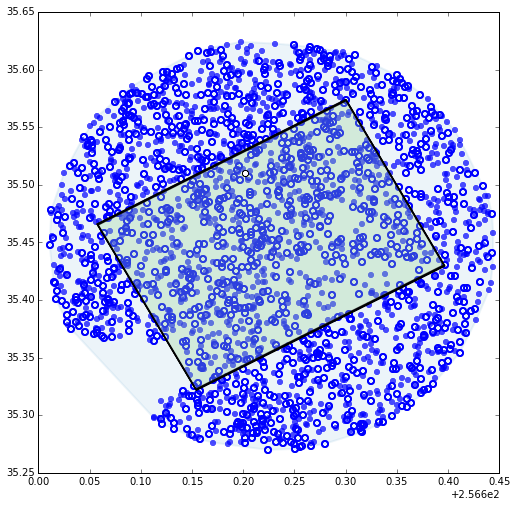

In [10]:
imc.show_skypatches()

**_Read the plot_** the open/filled marker are the galaxies/stars of the catalogue and the blue shade the contours of the region of the sky considered has covered by the catalogue. Each black rectangle is the FoV of each sources and the green area is the shared patch of sky. The white marker close to the center is the location of the target.

## Get PhotoPointsCollection

The get_photopoints methods will loop over the images and run 'get_photopoint' on each images. These photopoints are then combined in a PhotoPointCollection. The 'get_target_photopoints ' parses the target (if loaded) coords to feed 'get_photopoints'

In [11]:
pc = imc.get_target_photopoints(3,runits="kpc")

**Remark** We used here "kpc" units that the image knows how to convert into pixels. 

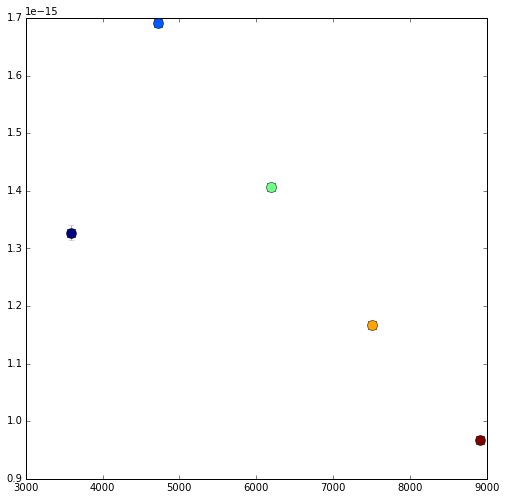

In [12]:
pc.show("sed")